<a href="https://colab.research.google.com/github/atwoy/DSC-207R-Mini-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read in Data

In [ ]:
import pandas as pd

In [ ]:
dataset_url = "https://raw.githubusercontent.com/atwoy/DSC-207R-Mini-Project/main/2016.csv"
df = pd.read_csv(dataset_url)

## Part 1: High Level View

In [ ]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [ ]:
df.shape

(157, 13)

This dataset contains information about the happiness of people in 157 countries. After looking at the head() of this dataset, we can see that most of the countries are in Western Europe. It has fields of happiness rank, happiness score, and factors that contribute to happiness. From the shape and first column, we see that the data has 157 rows, which means that a good number of countries were surveyed. Finally, the dataset has a mix of categories, such as family size, trust in government, and dystopia residual.

## Part 2: Preliminary Exploration

First, we describe the dataset and get information about it.

In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

Next, we convert certain variables to a usable format so that we can filter better. However, it seems like there is no need to convert any variables here.

Then, we check the dataset for null values since we want to eliminate these values so that our analysis will be easier. However, it seems like there are no null values in this dataset.

## Part 3: Defining Objectives

The objectives for the data analysis tasks are:


1.   What is the relationship between GDP per capita and happiness levels across different regions of the world?
2.   How does life expectancy correlate with happiness, and do health-related factors have a stronger impact on happiness in less developed countries?
3.   How does the perception of corruption in government and businesses correlate with happiness levels, and does this relationship differ across regions?

## Part 4: Present My Findings

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

#### 1. What is the relationship between GDP per capita and happiness levels across different regions of the world?

There are many factors that contribute to happiness in countries, one of them being standard of living. To analyze the relationship between one variable on happiness, we have to find the correlation. To perform a logical analysis, we will look at different regions.

Text(0.5, 1.0, 'GDP per Capita vs Happiness Score')

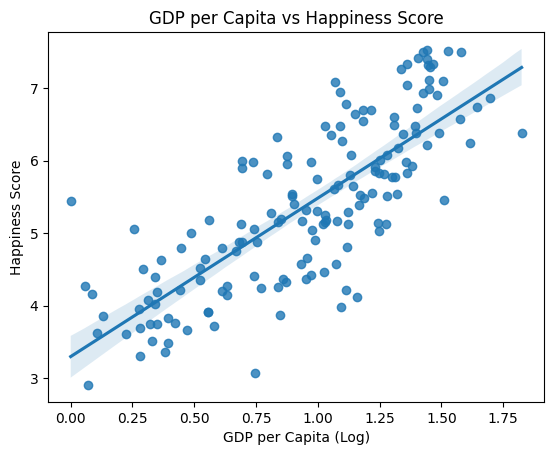

In [ ]:
# Create a scatterplot
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df)
plt.xlabel('GDP per Capita (Log)')
plt.title('GDP per Capita vs Happiness Score')

The scatter plot shows a strong positive relationship between GDP per capita (log
scale) and happiness scores. Countries with higher GDP per capita generally report
higher happiness levels. This trend shows the importance of economic wealth in
shaping well-being. This answers the question: Does money buy happiness?

#### 2. How does life expectancy correlate with happiness, and do health-related factors have a stronger impact on happiness in less developed countries?

Another factor that contributes to happiness in countries is life expectancy. To analyze the relationship between life expectancy and happiness, we have to find the correlation. To perform a logical analysis, we will look at different regions.

Text(0.5, 1.0, 'Life Expectancy vs Happiness Score')

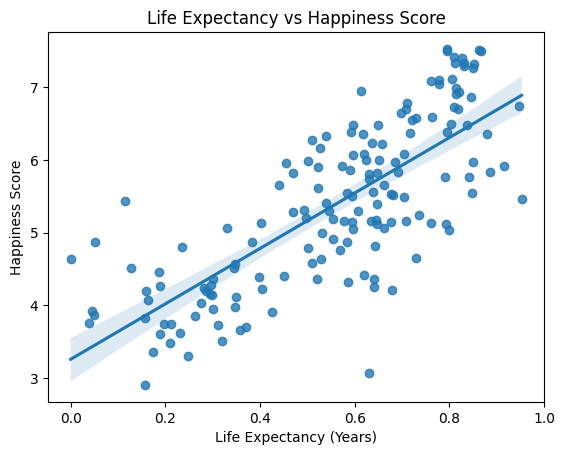

In [ ]:
# Create a scatterplot
sns.regplot(x='Health (Life Expectancy)', y='Happiness Score', data=df)
plt.xlabel('Life Expectancy (Years)')
plt.title('Life Expectancy vs Happiness Score')

Similarly, a positive correlation exists between life expectancy and happiness. Countries
where people live longer, healthier lives often report higher happiness. However, this
relationship seems weaker in less developed countries.

#### 3. How does the perception of corruption in government and businesses correlate with happiness levels, and does this relationship differ across regions?

A third factor that contributes to happiness in countries is government corruption. To analyze the relationship between government corruption and happiness, we have to find the correlation. To perform a logical analysis, we will look at countries in the lower economic quartile and countries in the upper economic quartile.

Text(0.5, 1.0, 'Corruption Perception vs Happiness Score')

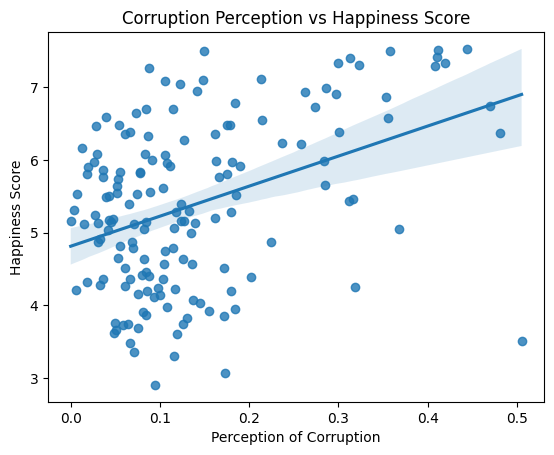

In [ ]:
# Create a scatterplot
sns.regplot(x='Trust (Government Corruption)', y='Happiness Score', data=df)
plt.xlabel('Perception of Corruption')
plt.title('Corruption Perception vs Happiness Score')

Based on the scatter plot, there is a positive correlation between corruption perception and happiness score. I was surprised to see this since I was expecting there to be a negative correlation.

## Part 5: Ethics

Are we 100% confident that features like "freedom" and "GDP per capita" can be represented numerically? Are there possible biases?